In [1]:
# importing all libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from random import seed
from sklearn.metrics import accuracy_score
import pickle

# importing python file having the class for MLP classifier
from toolkit import *

"""

    MyNeuralNetwork - class for MLP classfier defined in toolkit.py
   
"""

2022-03-01 09:18:05.969156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 09:18:05.969241: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'\n\n    MyNeuralNetwork - class for MLP classfier defined in toolkit.py\n   \n'

In [26]:
# Reading the fashion mnist data into train and test sets
np.random.seed(1)
((x_train, y_train), (x_test, y_test)) = tf.keras.datasets.fashion_mnist.load_data()
X = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

X = (X / 255) - 0.5
X = X.reshape((-1, 784))

In [27]:
# Splitting into train, validation and test data
np.random.seed(1)


indices = list(range(X.shape[0]))
training_instances = int(0.7 * X.shape[0])
validation_instances = int(0.1 * X.shape[0])
np.random.shuffle(indices)
train = indices[:training_instances]
validation = indices[training_instances:training_instances + validation_instances + 1]
test = indices[training_instances + validation_instances + 1:]

y = to_categorical(y)

X_train, X_validation, X_test = X[train], X[validation], X[test]
y_train, y_validation, y_test = y[train], y[validation], y[test]


In [28]:
X_train.shape, X_validation.shape, X_test.shape , y_train.shape, y_validation.shape, y_test.shape

((49000, 784), (7001, 784), (13999, 784), (49000, 10), (7001, 10), (13999, 10))

In [29]:
"""
 Performing experiment by varying the learning rate for tanh activation
 
"""
Experimental_Nets = [ 
                  MyNeuralNetwork(4, [784, 256, 64, 10], "tanh", 0.001, "random", X_train.shape[0], num_epochs =15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "tanh", 0.01, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "tanh", 0.1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "tanh", 1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD")
]

In [30]:
"""
  training the experimental models defined above and
  finally printing the testing accuracy for each model
"""
for i in range(4):
  myNet = Experimental_Nets[i]
  print('for network-',i)
  
  validationLoss, trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
  y_pred = myNet.predict(X_test) 
  y_test2 = np.argmax(y_test, axis = 1)

  print("test accuracy:",100*accuracy_score(y_pred, y_test2))
  print('##################################################################################\n\n')


for network- 0
Epoch: 1, Time Spent: 4.44s, Validation Accuracy: 36.02%
Epoch: 2, Time Spent: 7.75s, Validation Accuracy: 33.02%
Epoch: 3, Time Spent: 11.88s, Validation Accuracy: 25.04%
Epoch: 4, Time Spent: 17.21s, Validation Accuracy: 9.60%
Epoch: 5, Time Spent: 22.58s, Validation Accuracy: 9.60%
Epoch: 6, Time Spent: 27.87s, Validation Accuracy: 9.60%
Epoch: 7, Time Spent: 32.74s, Validation Accuracy: 9.56%
Epoch: 8, Time Spent: 37.61s, Validation Accuracy: 9.56%
Epoch: 9, Time Spent: 42.18s, Validation Accuracy: 9.56%
Epoch: 10, Time Spent: 47.10s, Validation Accuracy: 9.56%
Epoch: 11, Time Spent: 51.53s, Validation Accuracy: 9.56%
Epoch: 12, Time Spent: 56.21s, Validation Accuracy: 9.56%
Epoch: 13, Time Spent: 60.88s, Validation Accuracy: 9.56%
Epoch: 14, Time Spent: 65.36s, Validation Accuracy: 9.56%
Epoch: 15, Time Spent: 70.21s, Validation Accuracy: 9.56%
test accuracy: 9.786413315236803
##################################################################################


for n

/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)
/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 6, Time Spent: 23.40s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 26.26s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 29.09s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 32.52s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 35.50s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 38.50s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 41.26s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 44.03s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 46.99s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 49.92s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 2
Epoch: 1, Time Spent: 2.97s, Validation Accuracy: 12.63%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 2, Time Spent: 7.01s, Validation Accuracy: 10.33%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 3, Time Spent: 9.94s, Validation Accuracy: 10.37%
Epoch: 4, Time Spent: 12.91s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 16.30s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 20.25s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 23.31s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 26.62s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 30.20s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 33.73s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 38.63s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 43.32s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 46.47s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 49.33s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 52.39s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 3
Epoch: 1, Time Spent: 2.81s, Validation Accuracy: 13.87%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 2, Time Spent: 7.24s, Validation Accuracy: 9.56%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 3, Time Spent: 11.12s, Validation Accuracy: 10.37%
Epoch: 4, Time Spent: 15.26s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 19.34s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 22.90s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 26.14s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 29.61s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 33.10s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 36.89s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 41.19s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 45.07s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 48.47s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 52.21s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 56.79s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################




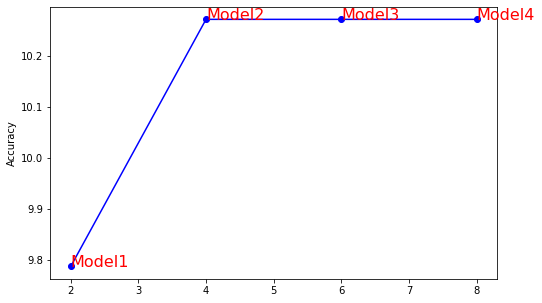

In [39]:
# Epoch vs Accuracy for above models 
X = [2,4,6,8]
Y = [9.786413315236803,10.27216229730695,10.27216229730695,10.27216229730695]

plt.figure(figsize=(8,5))
plt.ylabel("Accuracy")

for i in range(4):
  plt.text(X[i],Y[i],"Model"+str(i+1),color='red',fontdict={'size':'16'})


plt.plot(X,Y,'bo-')


In [31]:
"""
 Performing experiment by varying the learning rate for relu activation
"""

Experimental_Nets = [ 
                  MyNeuralNetwork(4, [784, 256, 64, 10], "relu", 0.001, "random", X_train.shape[0], num_epochs =15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "relu", 0.01, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "relu", 0.1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "relu", 1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD")
]

In [32]:
"""
  training the experimental models defined above and
  finally printing the testing accuracy for each model
"""

for i in range(4):
  myNet = Experimental_Nets[i]
  print('for network-',i)
  
  validationLoss, trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
  y_pred = myNet.predict(X_test) 
  y_test2 = np.argmax(y_test, axis = 1)

  print("test accuracy:",100*accuracy_score(y_pred, y_test2))
  print('##################################################################################\n\n')


for network- 0
Epoch: 1, Time Spent: 3.21s, Validation Accuracy: 11.53%
Epoch: 2, Time Spent: 7.72s, Validation Accuracy: 20.35%
Epoch: 3, Time Spent: 11.15s, Validation Accuracy: 25.10%
Epoch: 4, Time Spent: 15.04s, Validation Accuracy: 9.84%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 5, Time Spent: 19.41s, Validation Accuracy: 10.06%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 6, Time Spent: 23.01s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 26.48s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 30.29s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 34.14s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 37.96s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 42.13s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 46.03s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 51.02s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 54.57s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 58.22s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 1
Epoch: 1, Time Spent: 5.15s, Validation Accuracy: 17.40%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 2, Time Spent: 9.63s, Validation Accuracy: 18.21%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 3, Time Spent: 14.89s, Validation Accuracy: 10.37%
Epoch: 4, Time Spent: 19.10s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 23.38s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 27.72s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 32.52s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 35.98s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 39.84s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 43.40s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 47.65s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 51.50s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 55.15s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 59.14s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 63.17s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 2
Epoch: 1, Time Spent: 3.74s, Validation Accuracy: 13.10%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 2, Time Spent: 8.05s, Validation Accuracy: 10.37%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 3, Time Spent: 13.89s, Validation Accuracy: 10.37%
Epoch: 4, Time Spent: 20.13s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 25.82s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 29.07s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 32.65s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 39.55s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 44.59s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 48.57s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 52.07s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 55.56s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 58.95s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 62.05s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 65.38s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 3


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)


Epoch: 1, Time Spent: 2.73s, Validation Accuracy: 10.40%


/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 2, Time Spent: 7.01s, Validation Accuracy: 10.37%
Epoch: 3, Time Spent: 10.89s, Validation Accuracy: 10.37%
Epoch: 4, Time Spent: 14.43s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 18.56s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 22.27s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 26.20s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 29.55s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 33.15s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 37.06s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 40.60s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 43.62s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 46.96s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 49.86s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 52.96s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################




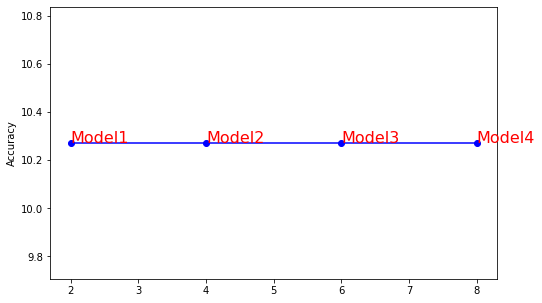

In [42]:
# Epoch vsAccuracy plot fro above models
X = [2,4,6,8]
Y = [10.27216229730695,10.27216229730695,10.27216229730695,10.27216229730695]

plt.figure(figsize=(8,5))
plt.ylabel("Accuracy")

for i in range(4):
  plt.text(X[i],Y[i],"Model"+str(i+1),color='red',fontdict={'size':'16'})


plt.plot(X,Y,'bo-')

In [34]:
"""
 Performing experiment by varying the learning rate for sigmoid activation
"""
Experimental_Nets = [ 
                  MyNeuralNetwork(4, [784, 256, 64, 10], "sigmoid", 0.001, "random", X_train.shape[0], num_epochs =15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "sigmoid", 0.01, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "sigmoid", 0.1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD"),
                  MyNeuralNetwork(4, [784, 256, 64, 10], "sigmoid", 1, "random", X_train.shape[0], num_epochs=15,optimizers = "GD")
]

In [ ]:
"""
  training the experimental models defined above and
  finally printing the testing accuracy for each model
"""

for i in range(4):
  myNet = Experimental_Nets[i]
  print('for network-',i)
  
  validationLoss, trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
  y_pred = myNet.predict(X_test) 
  y_test2 = np.argmax(y_test, axis = 1)

  print("test accuracy:",100*accuracy_score(y_pred, y_test2))
  print('##################################################################################\n\n')


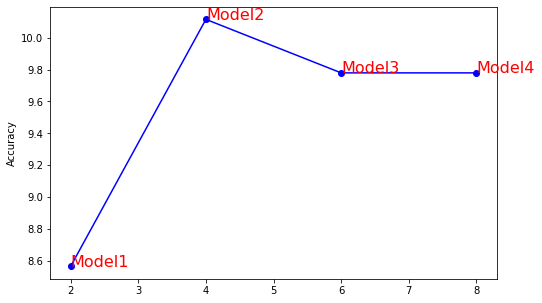

In [40]:
# Epoch vs Accuracy plot for above models
X = [2,4,6,8]
Y = [8.56489749267805, 10.115008214872491, 9.779269947853418, 9.779269947853418]

plt.figure(figsize=(8,5))
plt.ylabel("Accuracy")

for i in range(4):
  plt.text(X[i],Y[i],"Model"+str(i+1),color='red',fontdict={'size':'16'})


plt.plot(X,Y,'bo-')

In [43]:
"""
 Performing experiment for different hidden layer configuration
 for the better performing activation funciton -tanh and sigmoid
"""
Experimental_Nets = [ 
                  MyNeuralNetwork(3, [784, 256, 10], "tanh", 0.001, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(3, [784, 256, 10], "tanh", 0.01, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
                  MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.01, "random", X_train.shape[0], num_epochs =15, optimizers = "GD"),
]

In [44]:
"""
  training the experimental models defined above and
  finally printing the testing accuracy for each model
"""

for i in range(4):
  myNet = Experimental_Nets[i]
  print('for network-',i)
  
  validationLoss, trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
  y_pred = myNet.predict(X_test) 
  y_test2 = np.argmax(y_test, axis = 1)

  print("test accuracy:",100*accuracy_score(y_pred, y_test2))
  print('##################################################################################\n\n')


for network- 0
Epoch: 1, Time Spent: 5.29s, Validation Accuracy: 39.88%
Epoch: 2, Time Spent: 8.04s, Validation Accuracy: 27.64%
Epoch: 3, Time Spent: 10.57s, Validation Accuracy: 10.38%
Epoch: 4, Time Spent: 13.17s, Validation Accuracy: 10.47%
Epoch: 5, Time Spent: 15.78s, Validation Accuracy: 10.47%
Epoch: 6, Time Spent: 18.29s, Validation Accuracy: 10.50%
Epoch: 7, Time Spent: 21.33s, Validation Accuracy: 10.88%
Epoch: 8, Time Spent: 24.37s, Validation Accuracy: 9.56%
Epoch: 9, Time Spent: 27.62s, Validation Accuracy: 9.56%
Epoch: 10, Time Spent: 31.05s, Validation Accuracy: 9.56%
Epoch: 11, Time Spent: 34.38s, Validation Accuracy: 9.56%
Epoch: 12, Time Spent: 37.46s, Validation Accuracy: 9.56%
Epoch: 13, Time Spent: 40.79s, Validation Accuracy: 9.56%
Epoch: 14, Time Spent: 44.31s, Validation Accuracy: 9.56%
Epoch: 15, Time Spent: 47.70s, Validation Accuracy: 9.56%
test accuracy: 9.779269947853418
##################################################################################


f

/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:107: RuntimeWarning: invalid value encountered in true_divide
  return f / f.sum(axis=0)
/home/god_ert/Documents/assignments/DL/Assg1/Codes/toolkit.py:124: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element, axis = 0)*(1 - exp_element/np.sum(exp_element, axis = 0))


Epoch: 4, Time Spent: 12.70s, Validation Accuracy: 10.37%
Epoch: 5, Time Spent: 16.19s, Validation Accuracy: 10.37%
Epoch: 6, Time Spent: 19.56s, Validation Accuracy: 10.37%
Epoch: 7, Time Spent: 22.98s, Validation Accuracy: 10.37%
Epoch: 8, Time Spent: 26.62s, Validation Accuracy: 10.37%
Epoch: 9, Time Spent: 29.82s, Validation Accuracy: 10.37%
Epoch: 10, Time Spent: 32.28s, Validation Accuracy: 10.37%
Epoch: 11, Time Spent: 35.25s, Validation Accuracy: 10.37%
Epoch: 12, Time Spent: 38.25s, Validation Accuracy: 10.37%
Epoch: 13, Time Spent: 40.63s, Validation Accuracy: 10.37%
Epoch: 14, Time Spent: 43.40s, Validation Accuracy: 10.37%
Epoch: 15, Time Spent: 46.53s, Validation Accuracy: 10.37%
test accuracy: 10.27216229730695
##################################################################################


for network- 3
Epoch: 1, Time Spent: 2.20s, Validation Accuracy: 9.68%
Epoch: 2, Time Spent: 5.28s, Validation Accuracy: 9.68%
Epoch: 3, Time Spent: 8.30s, Validation Accuracy: 9.6

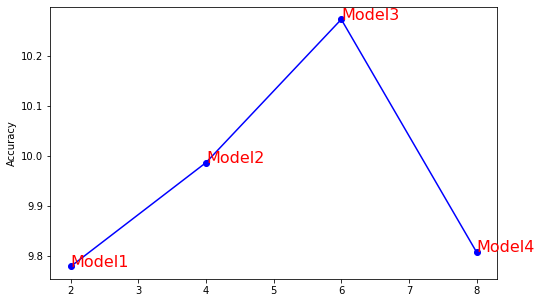

In [45]:
# Epoch vs accuracy plot for the above models
X = [2,4,6,8]
Y = [9.779269947853418,9.986427601971569, 10.27216229730695, 9.807843417386957]

plt.figure(figsize=(8,5))
plt.ylabel("Accuracy")

for i in range(4):
  plt.text(X[i],Y[i],"Model"+str(i+1),color='red',fontdict={'size':'16'})


plt.plot(X,Y,'bo-')


In [48]:
"""
 From above experiments, best model configuration 
 based on test set accuracy is re-trained and saved
 as best performing model using gradient descent 
"""

nn =  MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", X_train.shape[0], num_epochs =15, optimizers = "GD")

nn_validationLoss, nn_trainLoss = nn.fit(X_train, y_train, X_validation, y_validation)
y_pred = nn.predict(X_test) 

# filename = "../Saved models/best_config_GradientDescent.sav"
# pickle.dump(myNet, open(filename, 'wb'))         

Epoch: 1, Time Spent: 2.64s, Validation Accuracy: 9.68%
Epoch: 2, Time Spent: 5.51s, Validation Accuracy: 10.46%
Epoch: 3, Time Spent: 8.67s, Validation Accuracy: 23.30%
Epoch: 4, Time Spent: 11.05s, Validation Accuracy: 17.55%
Epoch: 5, Time Spent: 14.61s, Validation Accuracy: 21.34%
Epoch: 6, Time Spent: 17.77s, Validation Accuracy: 25.48%
Epoch: 7, Time Spent: 21.54s, Validation Accuracy: 26.32%
Epoch: 8, Time Spent: 24.45s, Validation Accuracy: 22.24%
Epoch: 9, Time Spent: 27.76s, Validation Accuracy: 32.10%
Epoch: 10, Time Spent: 31.49s, Validation Accuracy: 11.01%
Epoch: 11, Time Spent: 34.70s, Validation Accuracy: 26.41%
Epoch: 12, Time Spent: 38.14s, Validation Accuracy: 12.38%
Epoch: 13, Time Spent: 41.48s, Validation Accuracy: 18.01%
Epoch: 14, Time Spent: 44.87s, Validation Accuracy: 12.20%
Epoch: 15, Time Spent: 48.24s, Validation Accuracy: 9.98%


In [49]:
""" 
   re-loading best gradient descent model 
"""
GD_loaded =  pickle.load(open('../Saved models/best_config_GradientDescent.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

pre = GD_loaded.predict(X_test) 
100*accuracy_score(pre, y_test2)

9.807843417386957

In [ ]:
""" 
    Using momentum as optimization for best 
    gradient descent model configurations
"""
epochs = 50

myNet = MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", 64, epochs,optimizers="momentum")
momentum_validationLoss, momentum_trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
y_pred = myNet.predict(X_test) 

# saving the momentum  model
# filename = "/content/momentum.sav"
# pickle.dump(myNet, open(filename, 'wb'))

In [50]:
""" 
   re-loading saved momentum model 
"""
momentum_loaded =  pickle.load(open('../Saved models/momentum.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

y_pred = momentum_loaded.predict(X_test) 
100*accuracy_score(y_pred, y_test2)

90.64218872776627

In [ ]:
""" 
    Using Nesterov's accelerated gradient as optimization
    for best gradient descent model configurations
"""

epochs = 50
myNet = MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", 64, epochs, optimizers="NAG")
NAG_validationLoss, NAG_trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
NAG_y_pred = myNet.predict(X_test) 

# savign the Nesterov's accelerated gradient
# filename = "/content/NAG.sav"
# pickle.dump(myNet, open(filename, 'wb'))

In [51]:
""" 
   re-loading saved NAG model 
"""
NAG_loaded =  pickle.load(open('../Saved models/NAG.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

NAG_y_pred = NAG_loaded.predict(X_test) 
100*accuracy_score(NAG_y_pred, y_test2)

91.75655403957425

In [ ]:
""" 
    Using AdaGrad as optimization for best 
    gradient descent model configurations
"""

epochs = 50
myNet = MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", 64, epochs,optimizers="AdaGrad")
AdaGrad_validationLoss, AdaGrad_trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
AdaGrad_y_pred = myNet.predict(X_test) 

# saving the AdaGrad model
# filename = "/content/AdaGrad.sav"
# pickle.dump(myNet, open(filename, 'wb'))

In [52]:
""" 
   re-loading saved AdaGrad model 
"""
AdaGrad_loaded =  pickle.load(open('../Saved models/AdaGrad.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

AdaGrad_y_pred = AdaGrad_loaded.predict(X_test) 
100*accuracy_score(AdaGrad_y_pred, y_test2)

78.3913136652618

In [ ]:
""" 
    Using RMS as optimization for best 
    gradient descent model configurations
"""

epochs = 50
myNet = MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", 64, epochs,optimizers="RMS")
RMS_validationLoss, RMS_trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
RMS_y_pred = myNet.predict(X_test) 

# saving the RMS model
# filename = "/content/RMS.sav"
# pickle.dump(myNet, open(filename, 'wb'))


In [53]:
""" 
   re-loading saved RMS model 
"""
RMS_loaded =  pickle.load(open('../Saved models/RMS.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

RMS_y_pred = RMS_loaded.predict(X_test) 
100*accuracy_score(RMS_y_pred, y_test2)

89.01350096435459

In [ ]:
""" 
    Using Adam as optimization for best 
    gradient descent model configurations
"""

epochs = 50
myNet = MyNeuralNetwork(3, [784, 256, 10], "sigmoid", 0.001, "random", 64, epochs,optimizers="Adam")
Adam_validationLoss, Adam_trainLoss = myNet.fit(X_train, y_train, X_validation, y_validation)
Adam_y_pred = myNet.predict(X_test) 

# saving the Adam model
# filename = "/content/Adam.sav"
# pickle.dump(myNet, open(filename, 'wb'))

In [54]:
""" 
   re-loading saved Adam model 
"""
Adam_loaded =  pickle.load(open('../Saved models/Adam.sav','rb'))

y_test2 = np.argmax(y_test, axis = 1)

Adam_y_pred = Adam_loaded.predict(X_test) 
100*accuracy_score(Adam_y_pred, y_test2)

78.16272590899351

In [55]:
"""
    Test set accuracy for all optimizer models
"""

y_test2 = np.argmax(y_test, axis = 1)

print("test accuracy for gradient descent model:",end =" ")
print(100*accuracy_score(pre, y_test2))

print("test accuracy for Momentum model:",end =" ")
print(100*accuracy_score(y_pred, y_test2))

print("test accuracy for NAG model:",end =" ")
print(100*accuracy_score( NAG_y_pred, y_test2))

print("test accuracy for AdaGrad model:",end =" ")
print(100*accuracy_score(AdaGrad_y_pred, y_test2))

print("test accuracy for RMS model:",end =" ")
print(100*accuracy_score(RMS_y_pred, y_test2))

print("test accuracy for Adam model:",end =" ")
print(100*accuracy_score(Adam_y_pred, y_test2))

test accuracy for gradient descent model: 9.807843417386957
test accuracy for Momentum model: 90.64218872776627
test accuracy for NAG model: 91.75655403957425
test accuracy for AdaGrad model: 78.3913136652618
test accuracy for RMS model: 89.01350096435459
test accuracy for Adam model: 78.16272590899351


In [ ]:
# Epoch vs Validation accuracy for optimizers
 
epochs = 50
plt.figure(figsize=(10,8))
plt.plot(list(range(epochs)),momentum_validationLoss,  label = "Momentum")
plt.plot(list(range(epochs)),NAG_validationLoss,  label = "NAG")
plt.plot(list(range(epochs)),AdaGrad_validationLoss,  label = "AdaGrad")
plt.plot(list(range(epochs)),RMS_validationLoss,  label = "RMS")
plt.plot(list(range(epochs)),Adam_validationLoss,  label = "Adam")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.figlegend()
plt.show()

In [ ]:
# Epoch vs Train accuracy for optimizers
 
plt.figure(figsize=(10,8))
plt.plot(list(range(epochs)),momentum_trainLoss,  label = "Momentum")
plt.plot(list(range(epochs)),NAG_trainLoss,  label = "NAG")
plt.plot(list(range(epochs)),AdaGrad_trainLoss,  label = "AdaGrad")
plt.plot(list(range(epochs)),RMS_trainLoss,  label = "RMS")
plt.plot(list(range(epochs)),Adam_trainLoss,  label = "Adam")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.figlegend()
plt.show()